### WORLD  H Report (2015–2019) 

## Introduction
Happiness is a key indicator of human well-being and a growing priority for governments and international development organizations. The **World Happiness Report** ranks countries annually based on survey-based life evaluations and links these scores to national-level social and economic conditions.

In this project, I analyzed **five years of World Happiness Report data (2015–2019)** to understand:
- how happiness scores vary across countries and regions,
- which factors are most strongly associated with national happiness,
- how regional and country-level trends evolved over time,
- and which countries stand out as notable outliers (e.g., high GDP but low happiness).

## Dataset Overview
The data consists of five yearly datasets (**2015–2019**), each containing:
- `happiness_score` and `happiness_rank`
- predictors such as `gdp_per_capita`, `social_support`, `healthy_life_expectancy`, `freedom`, `generosity`, and `perceptions_of_corruption`

Because column names and structures differ across years (especially **2018–2019**), the analysis begins with **data cleaning and standardization**, including:
- renaming columns into consistent `snake_case`,
- adding missing columns for uniform structure,
- mapping `region` into 2018–2019 using a lookup table,
- and merging all years into a single dataset `df_combined`.

## Output Deliverables
This notebook produces:
1. A cleaned and merged dataset (`df_combined`)
2. Exploratory data quality checks
3. Visualizations (regions, trends, correlations, outliers)
4. A policy-friendly insight summary to support decision-making

In [1]:
# I imported necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## DATA LOADING & INSPECTION

In [2]:
# I loaded the datasets 

df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

## 2015 Dataset

## Data Dictionary 

| Column Name | Description |
|------------|------------|
| Country | Name of the country included in the World Happiness Report |
| Region | Geographical region to which the country belongs (e.g., Western Europe, Sub-Saharan Africa) |
| Happiness Rank | Rank of the country based on its happiness score (1 = happiest) |
| Happiness Score | Average national life evaluation score based on survey responses |
| Standard Error | Standard error of the happiness score estimate |
| Economy (GDP per Capita) | Contribution of GDP per capita to the happiness score |
| Family | Contribution of social support (family and close relationships) to happiness |
| Health (Life Expectancy) | Contribution of healthy life expectancy to happiness |
| Freedom | Contribution of freedom to make life choices to happiness |
| Trust (Government Corruption) | Perceived absence of corruption in government and business |
| Generosity | Contribution of generosity (measured by charitable behavior) to happiness |
| Dystopia Residual | Residual value capturing unexplained variation in happiness after accounting for all measured factors |

In [3]:
# I displayed the first five rows of dataframe

df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# I checked the structure and data types of the dataset

df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

This dataset contains **158 observations** (countries) and **12 variables**.  
There are **no missing values**, as all columns have 158 non-null entries, indicating good data completeness.

- **Object (categorical) variables (2):** `Country` and `Region`, which identify the country and its geographical grouping.
- **Integer variable (1):** `Happiness Rank`, representing the country’s position in the happiness ranking.
- **Numeric variables (9):** These include `Happiness Score` and its contributing factors such as GDP per capita, social support, health, freedom, generosity, corruption perception, and the dystopia residual.

In [5]:
# I checked for the descriotive statistics 

df_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


The summary statistics describe the distribution of the numerical variables across **158 countries**.

- **Happiness Score** ranges from **2.84 to 7.59**, with an average of **5.38**, indicating substantial variation in perceived well-being across countries.
- **Happiness Rank** has a mean and median close to **79**, which is expected given that rankings span from 1 to 158.
- **Standard Error** values are relatively small (mean ≈ 0.048), suggesting reasonably precise estimates of happiness scores.
- **GDP per Capita**, **Social Support (Family)**, and **Healthy Life Expectancy** show wide variability, highlighting large differences in economic and social conditions across countries.
- **Freedom**, **Generosity**, and **Perceptions of Corruption** have lower average values and wider relative spreads, indicating that these factors vary substantially and may influence happiness differently across regions.
- **Dystopia Residual** has a mean of about **2.10**, capturing the portion of happiness not directly explained by the measured factors.

Overall, the distributions suggest meaningful cross-country heterogeneity in both happiness levels and their underlying contributors, justifying further comparative and correlation-based analyses.

## 2016 Dataset

In [6]:
# I displayed the first five rows of dataframe

df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [7]:
# I checked the structure and data types of the dataset

df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

This dataset contains **157 observations** (countries) and **13 variables**, indicating a broad global coverage similar to the 2015 dataset. All columns have **157 non-null values**, confirming that the dataset is complete with no missing data.

- **Categorical variables (2):** `Country` and `Region`, which identify each country and its geographical classification.
- **Integer variable (1):** `Happiness Rank`, representing the relative position of each country in the happiness rankings.
- **Numeric variables (10):** These include `Happiness Score`, economic and social contributors (GDP per capita, social support, health, freedom, generosity, and corruption perception), as well as two uncertainty measures (`Lower Confidence Interval` and `Upper Confidence Interval`).

In [8]:
# I checked for descriotive statistics

df_2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971



The summary statistics describe the distribution of the numerical variables across **157 countries**.

- **Happiness Score** ranges from **2.91 to 7.53**, with an average of **5.38**, indicating persistent global disparities in perceived well-being that are comparable to the previous year.
- **Happiness Rank** has a mean and median close to **79**, which is expected given that rankings span from 1 to 157 and are evenly distributed across countries.
- **Lower and Upper Confidence Intervals** show relatively narrow ranges around the happiness score, suggesting that national happiness estimates are measured with reasonable precision despite cross-country variability.
- **GDP per Capita**, **Social Support (Family)**, and **Healthy Life Expectancy** display substantial variation, reflecting large differences in economic development, social structures, and population health across countries.
- **Freedom**, **Generosity**, and **Perceptions of Corruption** have lower average values and wider relative dispersion, indicating uneven access to personal autonomy, prosocial behavior, and institutional trust globally.
- **Dystopia Residual** has a mean of approximately **2.33**, capturing a sizeable portion of happiness that is not directly explained by the measured socioeconomic and institutional factors.

## 2017 Dataset

In [9]:
# I displayed the first five rows of dataframe

df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [10]:
# I checked the structure and data types of the dataset

df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

This dataset contains **155 observations** (countries) and **12 variables**, providing broad global coverage similar to previous years. All columns have **155 non-null values**, indicating complete data with no missing observations.

- **Categorical variable (1):** `Country`, which identifies each country included in the report.
- **Integer variable (1):** `Happiness.Rank`, representing the country’s position in the happiness ranking.
- **Numeric variables (10):** These include `Happiness.Score`, confidence bounds (`Whisker.high` and `Whisker.low`), economic and social contributors (GDP per capita, social support, health, freedom, generosity, and corruption perception), and the `Dystopia.Residual`.

In [11]:
# I checked for the descriotive statistics

df_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308



The summary statistics describe the distribution of the numerical variables across **155 countries**.

- **Happiness Score** ranges from **2.69 to 7.54**, with an average of **5.35**, indicating continued global inequality in perceived well-being, broadly consistent with previous years.
- **Happiness Rank** has a mean and median of **78**, which is expected given that rankings span from 1 to 155 and are approximately symmetrically distributed.
- **Whisker.high** and **Whisker.low** represent the upper and lower bounds of uncertainty around happiness scores. The relatively narrow gap between their averages suggests that happiness estimates are reasonably stable despite cross-country variation.
- **GDP per Capita**, **Social Support (Family)**, and **Healthy Life Expectancy** show substantial variability, reflecting wide disparities in economic capacity, social cohesion, and population health across countries.
- **Freedom**, **Generosity**, and **Perceptions of Corruption** have lower average values and notable dispersion, indicating uneven distribution of personal autonomy, prosocial behavior, and institutional trust worldwide.
- **Dystopia Residual** has a mean of approximately **1.85**, slightly lower than in earlier years, suggesting that a somewhat larger share of happiness in 2017 is explained by the observed socioeconomic and institutional variables.

## 2018 Dataset

## Data Dictionary 

| Column Name | Description |
|------------|------------|
| Overall rank | Rank of the country based on its happiness score (1 = happiest) |
| Country or region | Name of the country included in the World Happiness Report |
| Score | Average national life evaluation (happiness) score based on survey responses |
| GDP per capita | Contribution of GDP per capita to the happiness score |
| Social support | Contribution of social support (family and close relationships) to happiness |
| Healthy life expectancy | Contribution of healthy life expectancy to happiness |
| Freedom to make life choices | Contribution of perceived freedom to happiness |
| Generosity | Contribution of generosity (measured through charitable behavior) to happiness |
| Perceptions of corruption | Perceived level of corruption in government and business |


In [12]:
# I displayed the first five rows of dataframe

df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [13]:
# I checked the structure and data types of the dataset

df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB




This dataset contains **156 observations** (countries) and **9 variables**, reflecting a streamlined structure compared to earlier years. Most columns are complete, with only **one missing value** observed in the `Perceptions of corruption` variable.

- **Categorical variable (1):** `Country or region`, which identifies each country included in the report.
- **Integer variable (1):** `Overall rank`, representing the country’s position in the happiness ranking.
- **Numeric variables (7):** These include `Score` (happiness score) and key contributing factors such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

Unlike earlier datasets, the 2018 data **does not include regional classification, standard error, or dystopia residual variables**, indicating a methodological simplification in reporting. While the dataset remains largely complete and well-structured, the absence of these variables necessitates harmonization with earlier years before conducting longitudinal or regional analyses.

In [14]:
# I checked for descriptive statistics

df_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
GDP per capita,156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096
Social support,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644
Healthy life expectancy,156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030
Freedom to make life choices,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724
Generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598
Perceptions of corruption,155.0,0.112000,0.096492,0.000,0.05100,0.0820,0.13700,0.457


The summary statistics describe the distribution of the numerical variables across **156 countries**.

- **Happiness Score** ranges from **2.91 to 7.63**, with an average of **5.38**, indicating continued global inequality in perceived well-being and stability in overall happiness levels relative to the previous year.
- **Overall Rank** has a mean and median of **78.5**, which is expected given that rankings span from 1 to 156 and are evenly distributed across countries.
- **GDP per Capita**, **Social Support**, and **Healthy Life Expectancy** exhibit substantial variation, highlighting persistent disparities in economic conditions, social networks, and population health worldwide.
- **Social Support** maintains a relatively high median value (≈ **1.26**), reinforcing its role as a consistently strong contributor to happiness across countries.
- **Freedom to Make Life Choices** shows moderate dispersion, suggesting meaningful cross-country differences in perceived autonomy and individual agency.
- **Generosity** has a comparatively low mean and narrower range, indicating that while generosity contributes to happiness, its impact is smaller and more unevenly distributed than other factors.
- **Perceptions of Corruption** has low average values and notable dispersion, reflecting ongoing challenges related to institutional trust and governance in many countries.

## 2019 Dataset

In [15]:
# I displayed the first five rows of dataframe

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
# I checked the structure and data types of the dataset

df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB



This dataset contains **156 observations** (countries) and **9 variables**, maintaining the simplified structure introduced in the previous year. All columns have **156 non-null values**, indicating a fully complete dataset with no missing observations.

- **Categorical variable (1):** `Country or region`, which identifies the countries included in the report.
- **Integer variable (1):** `Overall rank`, representing each country’s position in the global happiness ranking.
- **Numeric variables (7):** These include `Score` (happiness score) and its key contributing factors: GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

Similar to 2018, the 2019 dataset **does not include regional classification, standard error, or dystopia residual variables**, reflecting a streamlined reporting approach. While the dataset is well-structured and complete, these omissions require harmonization with earlier years to enable consistent longitudinal and regional analyses.

In [17]:
# I checked for the descriotive statistics

df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


The summary statistics describe the distribution of the numerical variables across **156 countries**.

- **Happiness Score** ranges from **2.85 to 7.77**, with an average of **5.41**, indicating sustained global variation in perceived well-being and a slight increase in the upper bound compared to previous years.
- **Overall Rank** has a mean and median of **78.5**, which is expected given that rankings span from 1 to 156 and are evenly distributed across countries.
- **GDP per Capita**, **Social Support**, and **Healthy Life Expectancy** continue to show substantial variability, reflecting persistent disparities in economic resources, social connectedness, and population health across countries.
- **Healthy Life Expectancy** shows a higher median (≈ **0.79**) compared to earlier years, suggesting modest global improvements in health-related contributors to happiness.
- **Freedom to Make Life Choices** exhibits moderate dispersion, indicating continued cross-country differences in perceived autonomy and individual agency.
- **Generosity** maintains a relatively low mean and narrow range, implying that generosity contributes modestly and unevenly to national happiness outcomes.
- **Perceptions of Corruption** remains low on average with notable dispersion, highlighting ongoing challenges related to institutional trust and governance worldwide.

Overall, the 2019 distributions reinforce the view that happiness is a **multidimensional outcome**, shaped by economic, social, health, and institutional factors. The relative stability of these patterns compared to 2018 supports meaningful longitudinal analysis across the later years of the dataset.

## COLUMN STANDARDIZATION

## Column Renaming

In [18]:
# I defined column renaming dictionaries so I can standardize inconsistent column names across years.

rename_2015 = {
    "Country": "country",
    "Region": "region",
    "Happiness Rank": "happiness_rank",
    "Happiness Score": "happiness_score",
    "Standard Error": "standard_error",
    "Economy (GDP per Capita)": "gdp_per_capita",
    "Family": "social_support",
    "Health (Life Expectancy)": "healthy_life_expectancy",
    "Freedom": "freedom",
    "Trust (Government Corruption)": "perceptions_of_corruption",
    "Generosity": "generosity",
    "Dystopia Residual": "dystopia_residual"
}

rename_2016 = {
    "Country": "country",
    "Region": "region",
    "Happiness Rank": "happiness_rank",
    "Happiness Score": "happiness_score",
    "Lower Confidence Interval": "lower_confidence_interval",
    "Upper Confidence Interval": "upper_confidence_interval",
    "Economy (GDP per Capita)": "gdp_per_capita",
    "Family": "social_support",
    "Health (Life Expectancy)": "healthy_life_expectancy",
    "Freedom": "freedom",
    "Trust (Government Corruption)": "perceptions_of_corruption",
    "Generosity": "generosity",
    "Dystopia Residual": "dystopia_residual"
}

rename_2017 = {
    "Country": "country",
    "Happiness.Rank": "happiness_rank",
    "Happiness.Score": "happiness_score",
    "Whisker.high": "whisker_high",
    "Whisker.low": "whisker_low",
    "Economy..GDP.per.Capita.": "gdp_per_capita",
    "Family": "social_support",
    "Health..Life.Expectancy.": "healthy_life_expectancy",
    "Freedom": "freedom",
    "Generosity": "generosity",
    "Trust..Government.Corruption.": "perceptions_of_corruption",
    "Dystopia.Residual": "dystopia_residual"
}

rename_2018_2019 = {
    "Overall rank": "happiness_rank",
    "Country or region": "country",
    "Score": "happiness_score",
    "GDP per capita": "gdp_per_capita",
    "Social support": "social_support",
    "Healthy life expectancy": "healthy_life_expectancy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "perceptions_of_corruption"
}

I created renaming mappings because column names differ by year and must be unified before merging all datasets into a single DataFrame.

In [19]:
# I applied the renaming dictionaries to enforce consistent column naming across all datasets.

df_2015 = df_2015.rename(columns=rename_2015)
df_2016 = df_2016.rename(columns=rename_2016)
df_2017 = df_2017.rename(columns=rename_2017)
df_2018 = df_2018.rename(columns=rename_2018_2019)
df_2019 = df_2019.rename(columns=rename_2018_2019)

I renamed columns so that all yearly datasets share a common schema, which is required for merging.

## Post Renaming Validation

In [20]:
# I previewed the first few rows of each dataset after renaming to verify that column standardization was successful.

display(df_2015.head(2))
display(df_2016.head(2))
display(df_2017.head(2))
display(df_2018.head(2))
display(df_2019.head(2))

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,dystopia_residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


,country,happiness_rank,happiness_score,whisker_high,whisker_low,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


After renaming columns, I previewed the datasets to confirm that column standardization was successful before proceeding to region mapping and further harmonization steps. This validation ensures that
key identifiers such as `country` and `region` are correctly labeled and prevents error in subsequent preprocessing stages.

## Region Handling

In [21]:
# I created a region lookup table 

region_lookup = (
    df_2016[["country", "region"]]
    .drop_duplicates()
    .set_index("country")["region"]
)

df_2018["region"] = df_2018["country"].map(region_lookup)
df_2019["region"] = df_2019["country"].map(region_lookup)

 I built a region mapping from earlier years because the 2018 and 2019 datasets do not contain region data but require it for regional analysis.

In [22]:
# I previewed the first few rows of each dataset after the region mapping to verify that column standardization was successful.

display(df_2018.head(2))
display(df_2019.head(2))

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption,region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption,region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe


From the above, the region column has been added to each datasets. 

## Add Missing Columns (2018 & 2019)

In [23]:
# I added missing columns to 2018 and 2019 so all years share the same structure for merging.

for df in [df_2018, df_2019]:
    df["standard_error"] = np.nan
    df["dystopia_residual"] = np.nan


I added `standard_error` and `dystopia_residual` as missing (NaN) in 2018–2019 because these columns exist in earlier years and I need a uniform schema before concatenation.

In [24]:
# I previewed the first few rows of each dataset 

display(df_2018.head(2))
display(df_2019.head(2))

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption,region,standard_error,dystopia_residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,NaN,NaN
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,NaN,NaN


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption,region,standard_error,dystopia_residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,NaN,NaN
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,NaN,NaN


From the above, the `standard_error` and `dystopia_residual` are now displaying as missing (NaN) in 2018–2019 datasets 

## Adding a Year Column

In [25]:
# I added the year column to each dataset so I can track observations over time after merging

df_2015["year"] = 2015
df_2016["year"] = 2016
df_2017["year"] = 2017
df_2018["year"] = 2018
df_2019["year"] = 2019

In [26]:
# I previewed the first few rows of each dataset after adding the year column

display(df_2015.head(2))
display(df_2016.head(2))
display(df_2017.head(2))
display(df_2018.head(2))
display(df_2019.head(2))

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,dystopia_residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


,country,happiness_rank,happiness_score,whisker_high,whisker_low,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption,dystopia_residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption,region,standard_error,dystopia_residual,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe,NaN,NaN,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe,NaN,NaN,2018


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption,region,standard_error,dystopia_residual,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,NaN,NaN,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,NaN,NaN,2019


From the above, the year column has been added to the datasets. 

## Final Merge

In [27]:
# I vertically concatenated all five datasets into a single combined DataFrame.

df_combined = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

In [28]:
# I exported the combined dataset 

df_combined.to_csv("df_combined.csv", index=False)

In [29]:
# I previewed the first five five rows of the final dataframe

df_combined.head()

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,dystopia_residual,year,lower_confidence_interval,upper_confidence_interval,whisker_high,whisker_low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


## DATA QUALITY ASSESSMENT

In [30]:
# I confirmed the combined dataset structure to ensure the merge worked correctly.

df_combined.shape, df_combined.columns

((782, 17),
 Index(['country', 'region', 'happiness_rank', 'happiness_score',
        'standard_error', 'gdp_per_capita', 'social_support',
        'healthy_life_expectancy', 'freedom', 'perceptions_of_corruption',
        'generosity', 'dystopia_residual', 'year', 'lower_confidence_interval',
        'upper_confidence_interval', 'whisker_high', 'whisker_low'],
       dtype='object'))

The combined dataset contains **782 observations** and **17 variables**, representing country-level happiness data aggregated across **five years (2015–2019)**. Each row corresponds to a country–year observation, enabling both cross-sectional and longitudinal analysis.

The columns include:
- **Core identifiers:** `country`, `region`, and `year`
- **Outcome variables:** `happiness_score` and `happiness_rank`
- **Key contributors to happiness:** `gdp_per_capita`, `social_support`, `healthy_life_expectancy`, `freedom`, `generosity`, and `perceptions_of_corruption`
- **Uncertainty and residual measures:** `standard_error`, `dystopia_residual`, `lower_confidence_interval`, `upper_confidence_interval`, `whisker_high`, and `whisker_low`

Some columns related to uncertainty (confidence intervals and whisker bounds) are present only for specific years and therefore contain missing values for others. These columns were retained to preserve all available information while maintaining a unified schema across years.

Overall, the structure of `df_combined` confirms that the datasets were successfully standardized and merged, providing a comprehensive foundation for data quality checks and subsequent analytical tasks.

In [31]:
# I checked for missing values

df_combined.isna().sum().sort_values(ascending = False)

whisker_low                  627
whisker_high                 627
upper_confidence_interval    625
lower_confidence_interval    625
standard_error               624
dystopia_residual            312
region                       168
perceptions_of_corruption      1
generosity                     0
year                           0
country                        0
healthy_life_expectancy        0
social_support                 0
gdp_per_capita                 0
happiness_score                0
happiness_rank                 0
freedom                        0
dtype: int64

The missing values observed in the combined dataset are largely **structural and expected**, reflecting differences in reporting practices across years rather than data quality issues.

- **Whisker bounds (`whisker_low`, `whisker_high`)** are missing for **627 observations** because these measures are only reported in the 2017 dataset.
- **Confidence interval variables (`lower_confidence_interval`, `upper_confidence_interval`)** are missing for **625 observations**, as they are specific to the 2016 dataset.
- **Standard error** is missing for **624 observations** because it is reported only in earlier years and not included in 2018–2019.
- **Dystopia residual** is missing for **312 observations**, corresponding to the absence of this variable in the 2018 and 2019 datasets.
- **Region** has **168 missing values**, which are attributable to unmatched country names during region mapping or countries that appear only in later years.
- **Perceptions of corruption** has **a single missing value**, which is negligible and unlikely to affect overall analysis.
- All core analytical variables including `happiness_score`, `gdp_per_capita`, `social_support`, `healthy_life_expectancy`, `freedom`, `generosity`, and `year` have **no missing values**, indicating strong data completeness for primary analyses.

In [32]:
# I checked for the percentage of missing values

df_combined.isna().sum().sort_values(ascending = False) / len (df_combined) * 100

whisker_low                  80.179028
whisker_high                 80.179028
upper_confidence_interval    79.923274
lower_confidence_interval    79.923274
standard_error               79.795396
dystopia_residual            39.897698
region                       21.483376
perceptions_of_corruption     0.127877
generosity                    0.000000
year                          0.000000
country                       0.000000
healthy_life_expectancy       0.000000
social_support                0.000000
gdp_per_capita                0.000000
happiness_score               0.000000
happiness_rank                0.000000
freedom                       0.000000
dtype: float64

The percentage distribution of missing values further confirms that missingness in the dataset is **systematic and expected**, rather than indicative of poor data quality.

- **Whisker bounds (`whisker_low`, `whisker_high`)** are missing in approximately **80.18%** of the observations,
  reflecting that these measures are reported only in the 2017 dataset.
- **Confidence interval variables (`lower_confidence_interval`, `upper_confidence_interval`)** are missing in about
  **79.92%** of the data, as they are specific to the 2016 dataset.
- **Standard error** is missing in roughly **79.80%** of observations, corresponding to its absence in later years.
- **Dystopia residual** shows **39.90%** missingness, which aligns with the exclusion of this variable in the 2018 and 2019 datasets.
- **Region** is missing in **21.48%** of observations, primarily due to unmatched country names or countries appearing only in later years during region mapping.
- **Perceptions of corruption** has a negligible missing rate (**0.13%**), which is unlikely to influence results.
- All **core analytical variables**  including `happiness_score`, `gdp_per_capita`, `social_support`, `healthy_life_expectancy`, `freedom`, `generosity`, and `year` show **0% missingness**, indicating excellent data completeness for primary analyses.

In [33]:
# I checked for duplicate rows

df_combined.duplicated().sum()

0

From the above, there are no duplicate rows. 

## Data Quality Issues Observed

Several data quality considerations were identified during exploratory checks, most of which are
**structural and expected** rather than problematic.

First, **column naming and structure differed across years**, particularly in 2017 (use of whisker bounds and inconsistent naming) and in 2018–2019 (simplified variable set). These inconsistencies were addressed through systematic column renaming and standardization.

Second, **region information was missing in the 2018 and 2019 datasets**, which required mapping region values from earlier years using country names. A small proportion of region values remained missing due to unmatched country names.

Third, several variables exhibit **high levels of missingness**, including confidence intervals, whisker bounds, standard error, and dystopia residual. This missingness is **year-specific and structural**, reflecting changes in reporting practices rather than data loss.

Importantly, **core analytical variables** such as happiness score, GDP per capita, social support, healthy life expectancy, freedom, and generosity show little to no missing values, indicating strong data completeness for primary analyses.

Finally, **no duplicate records** were detected in the combined dataset, confirming that each row represents a unique country–year observation.

Overall, the dataset demonstrates good data quality after standardization and is suitable for regional, temporal, and multivariate analyses.

## Region Distribution Visualization

In [34]:
# I calculated the number of unique countries per region to understand geographical coverage in the dataset

region_counts = (
    df_combined
    .dropna(subset=["region"])
    .groupby("region")["country"]
    .nunique()
    .sort_values(ascending=False)
)

region_counts

region
Sub-Saharan Africa                 44
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: country, dtype: int64

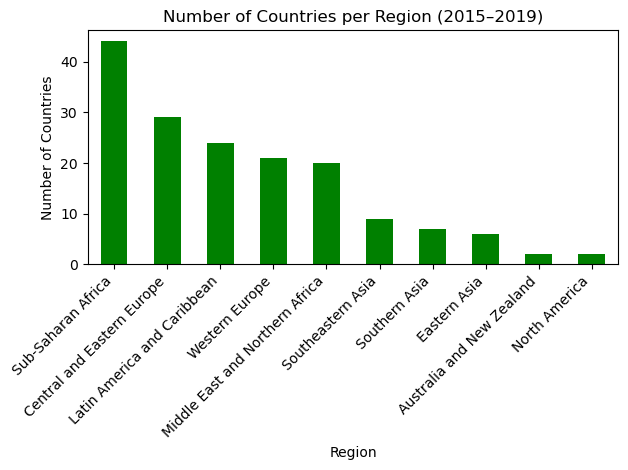

In [35]:
# I visualized the number of countries per region using a bar chart

plt.figure()
region_counts.plot(kind="bar", color = 'green')
plt.xlabel("Region")
plt.ylabel("Number of Countries")
plt.title("Number of Countries per Region (2015–2019)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

The chart shows that **Sub-Saharan Africa** has the largest representation in the dataset, with **over 40 countries**, making it the most represented region. This is followed by **Central and Eastern Europe** with **about 30 countries**, and **Latin America and the Caribbean** with **around 24 countries**. 

**Western Europe** and the **Middle East and North Africa** each contribute roughly **20 countries**, while regions such as **Southeastern Asia**, **Southern Asia**, and **Eastern Asia** have fewer countries, ranging from **about 6 to 9 countries**. The least represented regions are **Australia and New Zealand** and **North America**, each with **only about 2 countries**, which reflects the small number of countries in those regions rather than a lack of data coverage.

Overall, the figures show that the dataset includes countries from all major regions of the world, with higher counts in regions that naturally contain more countries.

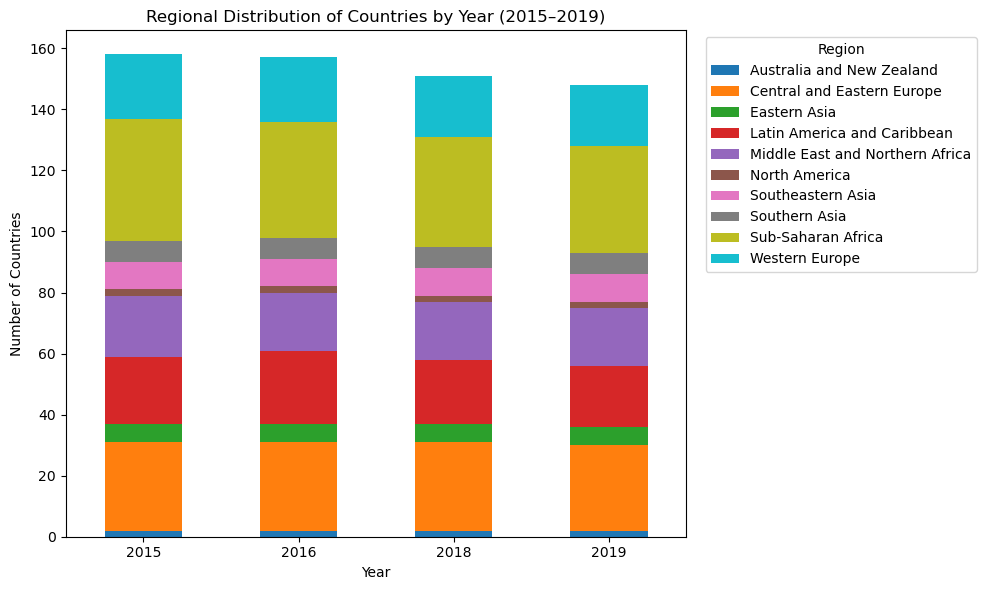

In [36]:
# I plotted a stacked bar chart 

plt.figure(figsize=(10, 6))

region_year_counts = (
    df_combined
    .dropna(subset=["region"])
    .groupby(["year", "region"])["country"]
    .nunique()
    .unstack()
)

region_year_counts.plot(kind="bar", stacked=True, ax=plt.gca())

plt.xlabel("Year")
plt.ylabel("Number of Countries")
plt.title("Regional Distribution of Countries by Year (2015–2019)")
plt.xticks(rotation=0)

plt.legend(
    title="Region",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


In [37]:
# I generated a pivot table to show how country representation varies by region and year.

region_year_table = (
    df_combined
    .dropna(subset=["region"])
    .groupby(["year", "region"])["country"]
    .nunique()
    .unstack()
)

region_year_table

region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,
2015,2,29,6,22,20,2,9,7,40,21
2016,2,29,6,24,19,2,9,7,38,21
2018,2,29,6,21,19,2,9,7,36,20
2019,2,28,6,20,19,2,9,7,35,20


The stacked bar chart illustrates how countries from different regions are represented in the dataset for each year between 2015 and 2019. 

Regions such as Sub-Saharan Africa, Central and Eastern Europe, Latin America and the Caribbean, and Western Europe consistently account for the largest shares, while smaller regions like North America and Australia & New Zealand remain minimally represented.

The accompanying table provides the exact country counts underlying the visualization and confirms that regional representation remains largely stable over time, with only minor declines in some regions. 

Together, the chart and table show that changes in happiness trends are not driven by shifts in regional coverage but reflect changes in happiness outcomes within consistently represented regions.

## Trend Analysis of Happiness Score

In [38]:
# I selected the top 5 happiest countries for each year using the happiness score

top5_per_year = (
    df_combined
    .sort_values(["year", "happiness_score"], ascending=[True, False])
    .groupby("year")
    .head(5)
)

In [39]:
# I previewed it

top5_per_year[["year", "country", "happiness_score"]]

,year,country,happiness_score
0,2015,Switzerland,7.587
1,2015,Iceland,7.561
2,2015,Denmark,7.527
3,2015,Norway,7.522
4,2015,Canada,7.427
158,2016,Denmark,7.526
159,2016,Switzerland,7.509
160,2016,Iceland,7.501
161,2016,Norway,7.498
162,2016,Finland,7.413


The table shows that a small group of countries consistently dominates the top five happiest rankings between 2015 and 2019. In the earlier years (2015–2016), countries such as **Switzerland, Denmark, Norway, and Iceland** repeatedly appear among the top performers, with **Finland** entering the top five in 2016.

From 2017 onward, **Finland** becomes a persistent top-ranked country and shows a clear upward trend, moving from fifth place in 2016 to the highest happiness score by 2019. **Denmark, Norway, and Iceland** remain consistently within the top five throughout the period, although their happiness scores show minor fluctuations rather than strong upward or downward trends.

Overall, the results suggest that happiness leadership is stable and concentrated among a small set of high-performing countries, with gradual improvements over time rather than dramatic shifts in rankings.


In [40]:
# I extracted the unique country names that appeared in the yearly top 5 list.

top_countries = top5_per_year["country"].unique()
top_countries

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands'], dtype=object)

The above shows the set of countries that appeared in the top five happiest rankings at least once between 2015 and 2019. This group includes **Switzerland, Iceland, Denmark, Norway, Canada, Finland, and the Netherlands**, indicating that happiness leadership is concentrated among a small and relatively stable set of high-performing countries.

Most of these countries are located in **Western Europe and Northern Europe**, suggesting regional clustering in top happiness outcomes. The limited number of countries in this list highlights that sustained high happiness levels are not widely distributed globally but are consistently achieved by a few countries over time.

In [41]:
# I collected all unique countries that appeared in the top 5 at least once.

# I ensured that once a country enters the top 5 in any year, its happiness trend is tracked across all years for consistency.

top_countries = top5_per_year["country"].unique()

trend_data = df_combined[df_combined["country"].isin(top_countries)]
trend_data.head()

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,social_support,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,dystopia_residual,year,lower_confidence_interval,upper_confidence_interval,whisker_high,whisker_low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


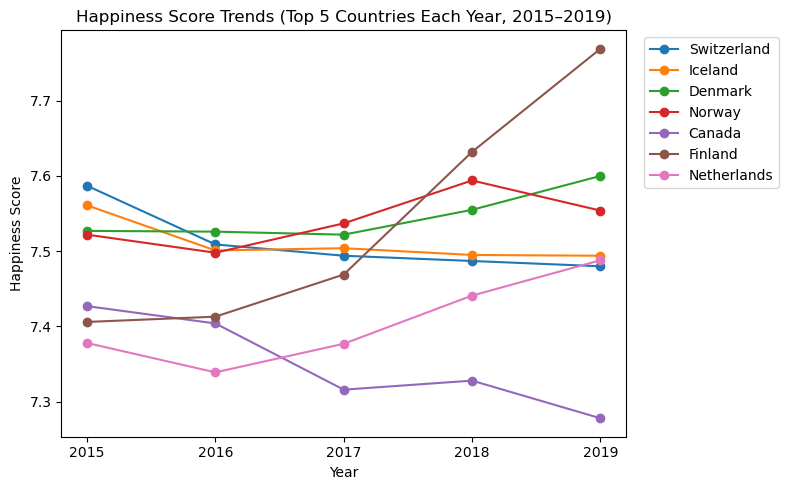

In [42]:
# I used a line plot to compare how happiness scores changed from 2015–2019 for countries that consistently appear among the top performers

plt.figure(figsize=(8, 5))

for country in top_countries:
    temp = trend_data[trend_data["country"] == country]
    plt.plot(temp["year"], temp["happiness_score"], marker="o", label=country)

plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score Trends (Top 5 Countries Each Year, 2015–2019)")
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

The trend plot shows that **Finland** exhibits the strongest and most consistent improvement in happiness scores over the 2015–2019 period, with a clear upward trajectory that culminates in the highest score by 2019. This indicates sustained progress rather than short-term fluctuations.

Countries such as **Denmark** and **Norway** maintain relatively high and stable happiness levels, with only minor year-to-year variations. In contrast, **Switzerland** and **Iceland** show slight declines or stagnation over time, suggesting that while they remain among the happiest countries, their relative performance has plateaued.

**Canada** displays a gradual downward trend, whereas the **Netherlands** shows modest improvement after an initial dip. Overall, the plot highlights that leadership among the happiest countries is dynamic, with Finland emerging as the clear leader due to steady long-term gains rather than abrupt changes.

## Correlation Analysis

In [43]:
# I selected the key numerical variables related to happiness and its potential drivers

# I created a list first
corr_columns = [
    "happiness_score",
    "gdp_per_capita",
    "social_support",
    "healthy_life_expectancy",
    "freedom",
    "generosity",
    "perceptions_of_corruption"
]

In [44]:
# I converted it to a dataframe
corr_data = df_combined[corr_columns]


# I previewed the first five columns
corr_data.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [45]:
# I compute the Pearson correlation matrix to quantify linear relationships between variables.

# Pearson correlation helps measure the strength and direction of association between happiness score and its potential drivers

correlation_matrix = corr_data.corr()
correlation_matrix

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption
happiness_score,1.000000,0.789284,0.648799,0.742456,0.551258,0.137578,0.398418
gdp_per_capita,0.789284,1.000000,0.585966,0.784338,0.340511,-0.014560,0.306307
social_support,0.648799,0.585966,1.000000,0.572650,0.420361,-0.037262,0.126401
healthy_life_expectancy,0.742456,0.784338,0.572650,1.000000,0.340745,0.010638,0.250512
freedom,0.551258,0.340511,0.420361,0.340745,1.000000,0.290706,0.459593
generosity,0.137578,-0.014560,-0.037262,0.010638,0.290706,1.000000,0.318920
perceptions_of_corruption,0.398418,0.306307,0.126401,0.250512,0.459593,0.318920,1.000000


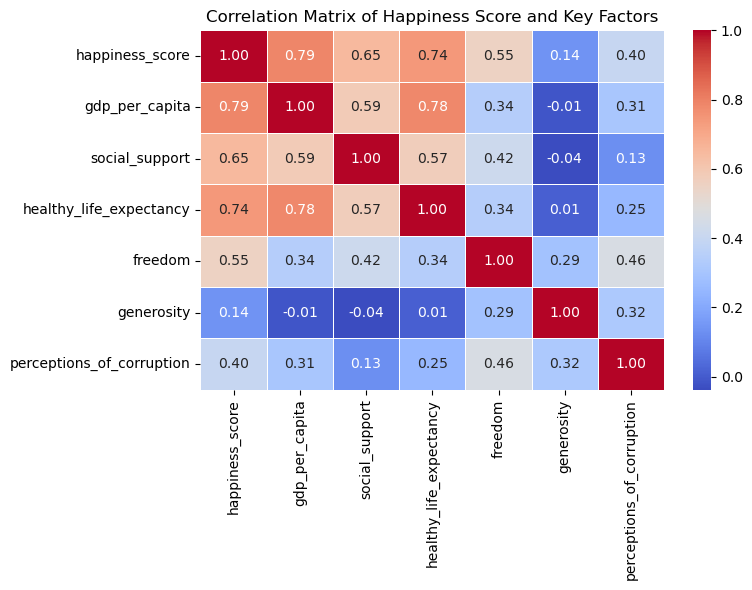

In [46]:
# I visualized the correlation matrix using a heatmap for easier interpretation.

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix of Happiness Score and Key Factors")
plt.tight_layout()
plt.show()

The correlation matrix indicates that **economic and structural factors are the strongest drivers of happiness** across countries. **GDP per capita** shows the highest correlation with happiness score (r = 0.79), closely followed by **healthy life expectancy** (r ≈ 0.74). This suggests that wealth and health infrastructure are foundational to national well-being.

**Social support** also exhibits a strong positive relationship with happiness (r = 0.65), highlighting the importance of social networks and community support systems. **Freedom to make life choices** shows a moderate association (r = 0.55), indicating that personal autonomy contributes meaningfully to happiness but is less influential than economic or health factors.

**Perceptions of corruption** are moderately correlated with happiness (r = 0.40), suggesting that trust in institutions and governance quality plays a supporting role in shaping well-being. In contrast, **generosity** displays a weak direct relationship with happiness (r = 0.14), implying that  behavior alone does not strongly predict national happiness levels.

Notably, generosity shows little to no correlation with GDP and social support, indicating that generosity operates independently of economic prosperity. Overall, the results suggest that **long-term investments in economic stability, healthcare, social support, and good governance are more impactful for improving happiness than short-term or individual-level behavioral factors**.

## Regional Comparison

In [47]:
# I computed the average happiness score by region and year

# I aggregated happiness scores at the regional level for each year to compare how well-being evolves across regions over time

region_year_avg = (
    df_combined
    .dropna(subset=["region"])
    .groupby(["region", "year"])["happiness_score"]
    .mean()
    .reset_index()
)


# I previewed the first  rows
region_year_avg.head()

,region,year,happiness_score
0,Australia and New Zealand,2015,7.285000
1,Australia and New Zealand,2016,7.323500
2,Australia and New Zealand,2018,7.298000
3,Australia and New Zealand,2019,7.267500
4,Central and Eastern Europe,2015,5.332931


The table displays the average happiness score for each region across different years, providing a regional-level comparison of well-being over time. **Australia and New Zealand** consistently record the highest average happiness scores (around 7.27–7.32), indicating strong and stable well-being across the period.

In contrast, regions such as **Central and Eastern Europe** show lower average happiness scores (around 5.33 in 2015), highlighting notable regional disparities in perceived well-being. The relatively small year-to-year changes within regions suggest that happiness levels tend to be **structurally stable**, with improvements or declines occurring gradually rather than abruptly.

Overall, this table confirms that regional differences in happiness are persistent over time and are likely influenced by long-term socioeconomic, institutional, and health-related factors rather than short-term fluctuations.

In [48]:
# I reshaped the regional averages into a pivot table for clearer comparison.

# This table makes it easier to observe year-by-year changes in average happiness across regions.

region_pivot = region_year_avg.pivot(
    index="year",
    columns="region",
    values="happiness_score"
)

region_pivot

region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,
2015,7.2850,5.332931,5.626167,6.144682,5.406900,7.273,5.317444,4.580857,4.202800,6.689619
2016,7.3235,5.370690,5.624167,6.101750,5.386053,7.254,5.338889,4.563286,4.136421,6.685667
2018,7.2980,5.463966,5.672000,5.938619,5.282737,7.107,5.313444,4.603857,4.230500,6.829100
2019,7.2675,5.571786,5.688833,5.942550,5.237000,7.085,5.273667,4.526857,4.340657,6.898400


The pivot table presents the average happiness scores for each region across the years 2015 to 2019, allowing for direct year-by-year comparison. **Australia and New Zealand** consistently record the highest average happiness scores (around 7.26–7.32), followed closely by **Western Europe** and **North America**, indicating sustained high well-being in these regions.

Regions such as **Latin America and the Caribbean** and **Eastern Asia** occupy a middle position, with moderate but relatively stable happiness levels over time. In contrast, **Sub-Saharan Africa** and **Southern Asia** consistently report the lowest average happiness scores, remaining below 5 across all years, which highlights persistent regional inequalities in well-being.

Overall, the table shows that while minor fluctuations occur from year to year, **regional happiness rankings remain largely stable**, suggesting that long-term socioeconomic, institutional, and health-related factors play a stronger role in shaping happiness than short-term changes.

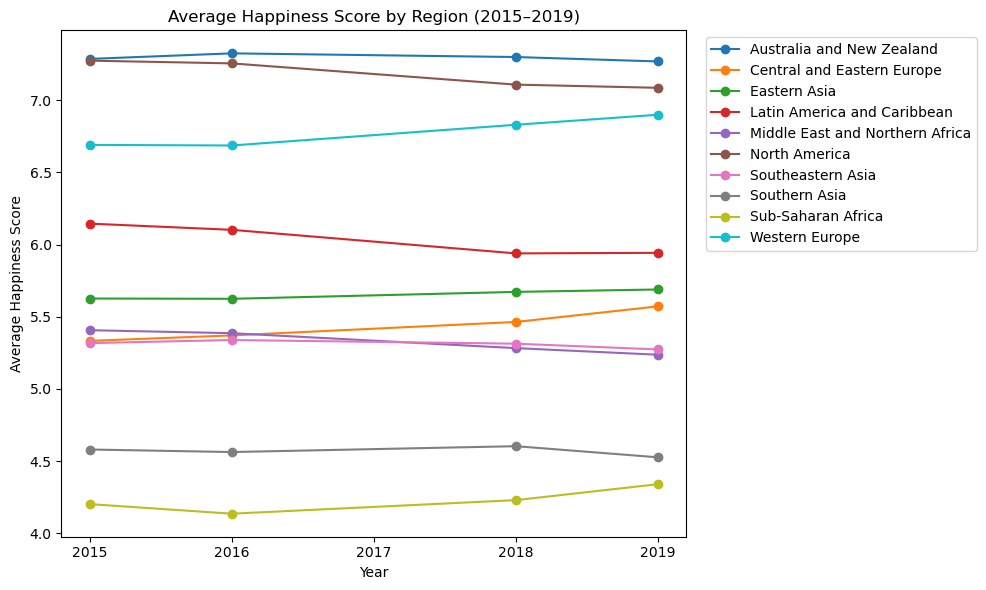

In [49]:
# I visualized regional happiness trends over time using a line plot

# The line plot highlights differences in average happiness trajectories across regions from 2015 to 2019.


plt.figure(figsize=(10, 6))

for region in region_pivot.columns:
    plt.plot(
        region_pivot.index,
        region_pivot[region],
        marker="o",
        label=region
    )

plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.title("Average Happiness Score by Region (2015–2019)")
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

The line plot illustrates how average happiness scores evolved across regions between 2015 and 2019. **Australia and New Zealand** consistently record the highest happiness levels throughout the period, with scores remaining above 7.2, indicating strong and sustained well-being with only minor fluctuations over time.

**Western Europe** and **North America** also maintain relatively high happiness scores, although both regions show a slight downward trend after 2016, suggesting mild stagnation rather than continued improvement. In contrast, **Central and Eastern Europe** demonstrates a gradual upward trend, indicating steady improvement in average happiness levels over the years.

Regions such as **Latin America and the Caribbean** and **Middle East and Northern Africa** display moderate happiness levels but show a slow decline over time, pointing to potential emerging challenges in sustaining well-being. **Eastern Asia** remains largely stable, with minimal year-to-year variation.

At the lower end of the distribution, **Southern Asia** and **Sub-Saharan Africa** consistently record the lowest average happiness scores. While Sub-Saharan Africa shows a slight improvement by 2019, both regions remain well below the global average, highlighting persistent regional inequalities.

Overall, the plot demonstrates that **regional disparities in happiness are persistent and change gradually**, reinforcing the idea that long-term structural, economic, and institutional factors play a stronger role in shaping regional happiness than short-term fluctuations.

## Country-Level Case Study

In [50]:
# I filtered the combined dataset to include only Finland.

# I focused on Finland as a country-level case study to examine how changes in key indicators relate to its happiness trend over time.

finland_data = df_combined[df_combined["country"] == "Finland"].sort_values("year")

finland_data[[
    "year",
    "happiness_score",
    "gdp_per_capita",
    "social_support",
    "healthy_life_expectancy",
    "freedom",
    "generosity",
    "perceptions_of_corruption"
]]

,year,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption
5,2015,7.406,1.290250,1.318260,0.889110,0.641690,0.233510,0.413720
162,2016,7.413,1.405980,1.134640,0.810910,0.571040,0.254920,0.410040
319,2017,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
470,2018,7.632,1.305000,1.592000,0.874000,0.681000,0.202000,0.393000
626,2019,7.769,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000


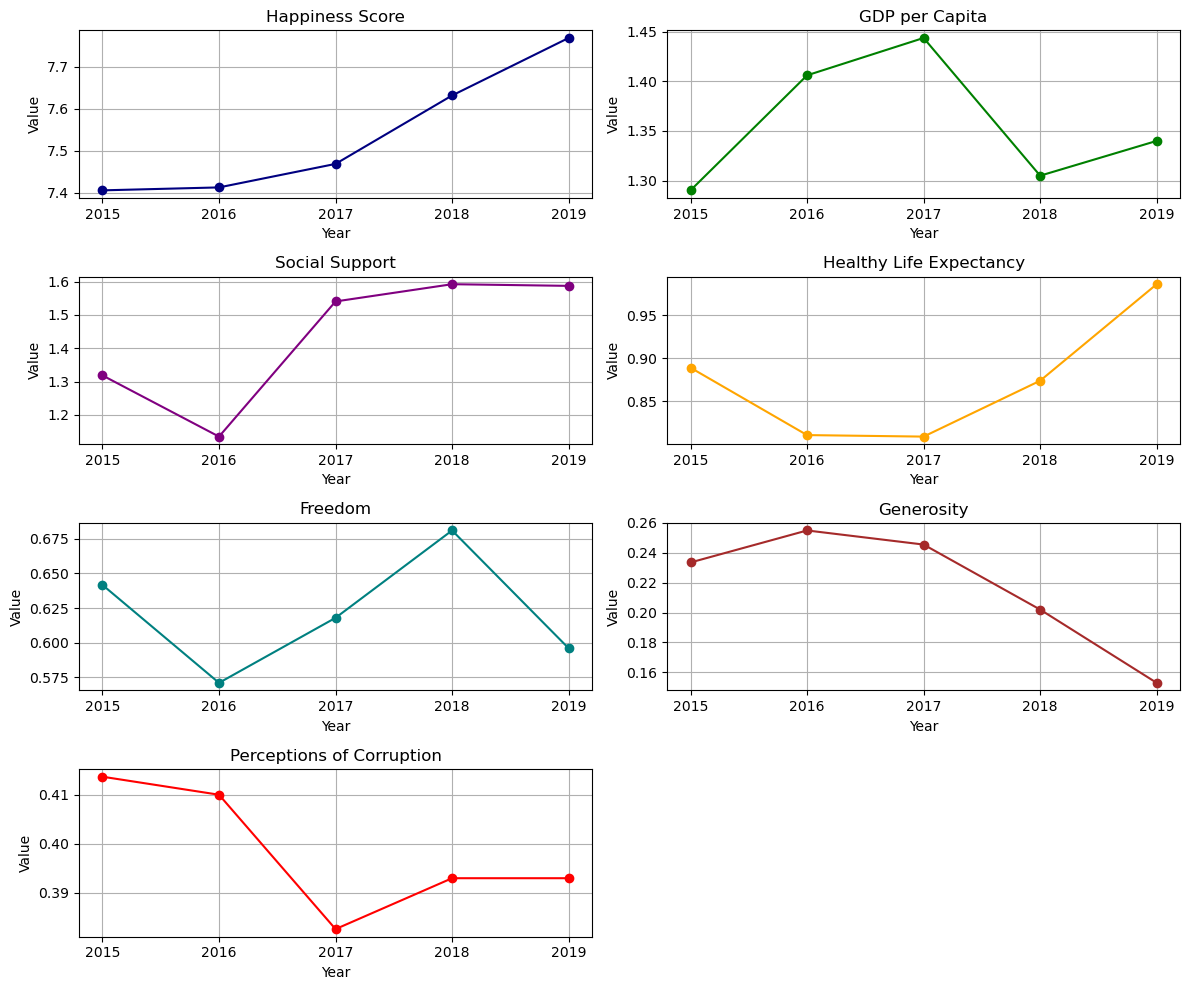

In [51]:
# I created a small-multiples chart to show Finland’s indicators over time, one subplot per indicator.

# I uses one subplot per indicator to make it easy to compare how each factor changes from 2015–2019 without overlapping lines, improving clarity and interpretation.

import matplotlib.pyplot as plt

indicators = [
    "happiness_score",
    "gdp_per_capita",
    "social_support",
    "healthy_life_expectancy",
    "freedom",
    "generosity",
    "perceptions_of_corruption"
]

titles = [
    "Happiness Score",
    "GDP per Capita",
    "Social Support",
    "Healthy Life Expectancy",
    "Freedom",
    "Generosity",
    "Perceptions of Corruption"
]

colors = ["navy", "green", "purple", "orange", "teal", "brown", "red"]

plt.figure(figsize=(12, 10))

for i, (col, title, color) in enumerate(zip(indicators, titles, colors), start=1):
    plt.subplot(4, 2, i)
    plt.plot(finland_data["year"], finland_data[col], marker="o", color=color)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.xticks([2015, 2016, 2017, 2018, 2019])
    plt.grid(True)

# I removed the unused empty subplot (since 4x2 gives 8 slots but I only need 7).
# I deleted the extra subplot space to keep the layout clean and focused on the indicators.

plt.subplot(4, 2, 8)
plt.axis("off")

plt.tight_layout()
plt.show()

The small-multiple plots show that Finland’s happiness score increased steadily from 2015 to 2019, reaching its highest level in 2019. This upward trend aligns closely with consistent improvements in healthy life expectancy and strong, stable social support, suggesting that long-term health outcomes and social cohesion played a major role in sustaining well-being.

While GDP per capita fluctuated slightly, overall happiness continued to rise, indicating that economic growth alone was not the primary driver of improved happiness during this period. Freedom remained relatively high despite minor year-to-year variation, reinforcing Finland’s strong institutional environment.

Notably, generosity declined over time, yet this did not negatively impact overall happiness, implying that structural factors (health, trust, social support) outweighed individual altruistic behavior. Perceptions of corruption remained low and stable, supporting the idea that trust in institutions contributed to Finland’s consistently high happiness rankings.

Overall, Finland’s case highlights that sustained investments in health systems, social support, and institutional trust are more influential for long-term happiness than short-term economic or behavioral fluctuations.

## Detecting Outliers

In [52]:
# I identified GDP–happiness outliers using median-based thresholds

# I used the median as a simple and robust reference point to separate "high" and "low" values of GDP per capita and happiness score.
# Unlike extreme percentiles,the median ensures that enough observations fall into each group,
# making it easier to interpret patterns and identify meaningful mismatches between economic wealth and subjective well-being.

# I compute the median GDP per capita across all countries and years
gdp_median = df_combined["gdp_per_capita"].median()

# I computed the median happiness score across all countries and years
happy_median = df_combined["happiness_score"].median()

In [53]:
# I identified countries with high GDP but relatively low happiness

# These countries are economically above average but report below-average happiness, suggesting that higher income alone does not guarantee well-being.
high_gdp_low_happy = df_combined[
    (df_combined["gdp_per_capita"] >= gdp_median) &
    (df_combined["happiness_score"] <= happy_median)
][["country", "year", "gdp_per_capita", "happiness_score"]]

In [54]:
# I identified countries with low GDP but relatively high happiness

# These countries achieve above-average happiness despite below-average income, highlighting the potential role of social, institutional, or cultural factors.
low_gdp_high_happy = df_combined[
    (df_combined["gdp_per_capita"] <= gdp_median) &
    (df_combined["happiness_score"] >= happy_median)
][["country", "year", "gdp_per_capita", "happiness_score"]]

In [55]:
# I previewed the first few records from each group
high_gdp_low_happy.head(), low_gdp_high_happy.head()

(        country  year  gdp_per_capita  happiness_score
 79   Azerbaijan  2015         1.02389            5.212
 85      Romania  2015         1.04345            5.124
 87     Portugal  2015         1.15991            5.102
 88       Latvia  2015         1.11312            5.098
 101      Greece  2015         1.15406            4.857,
         country  year  gdp_per_capita  happiness_score
 11   Costa Rica  2015         0.95578            7.226
 15       Brazil  2015         0.98124            6.983
 32     Colombia  2015         0.91861            6.477
 33     Thailand  2015         0.96690            6.455
 41  El Salvador  2015         0.76454            6.130)

This table displays a preview of countries classified as GDP–happiness outliers using median-based thresholds. 

The first group highlights countries with **above-median GDP per capita but below-median happiness scores**, suggesting that higher economic output does not always translate into higher subjective well-being.

The second group includes countries with **below-median GDP per capita but above-median happiness scores**, indicating that non-economic factors such as social cohesion, governance quality, cultural values, or community support may play a significant role in sustaining happiness. 

Overall, this preview confirms that the GDP–happiness relationship, while generally positive, contains meaningful deviations that warrant deeper policy and contextual analysis.

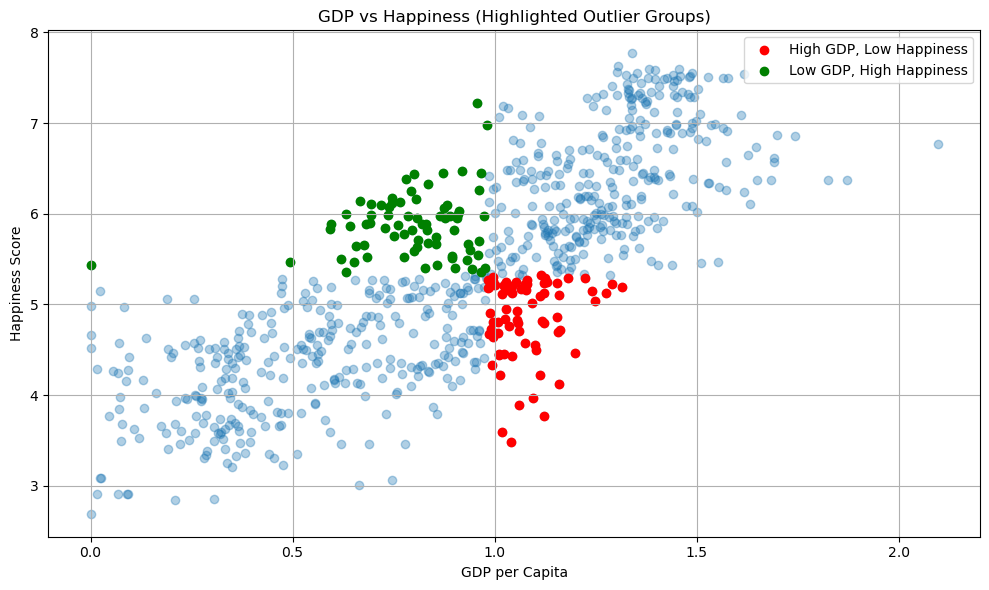

In [56]:
# I visualized the relationship between GDP per capita and happiness score and highlighted outlier groups

# I used a scatter plot to show the general GDP–happiness relationship across all observations.
# I then highlighted two groups: (1) high GDP but low happiness, and (2) low GDP but high happiness, to make deviations from the typical pattern easy to spot.


plt.figure(figsize=(10, 6))

# I ploted all observations as the background points
plt.scatter(
    df_combined["gdp_per_capita"],
    df_combined["happiness_score"],
    alpha=0.35
)

# I overlayed high-GDP but low-happiness observations
plt.scatter(
    high_gdp_low_happy["gdp_per_capita"],
    high_gdp_low_happy["happiness_score"],
    color="red",
    label="High GDP, Low Happiness"
)

# I overlayed low-GDP but high-happiness observations
plt.scatter(
    low_gdp_high_happy["gdp_per_capita"],
    low_gdp_high_happy["happiness_score"],
    color="green",
    label="Low GDP, High Happiness"
)

plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("GDP vs Happiness (Highlighted Outlier Groups)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot visualizes the relationship between GDP per capita and happiness scores across all country–year observations.  

The blue points represent the **full dataset**, providing a background distribution that illustrates the general positive association between economic prosperity and happiness.

The highlighted points emphasize two notable outlier groups:
- **Red points (High GDP, Low Happiness):** Countries with relatively strong economic performance but lower-than-expected happiness levels, suggesting that income alone does not guarantee well-being and that social, institutional, or inequality-related factors may play a limiting role.
- **Green points (Low GDP, High Happiness):** Countries that achieve comparatively high happiness despite lower income levels, indicating the potential importance of non-economic drivers such as social support, community cohesion, trust, and governance.

By contrasting these highlighted groups against the broader blue distribution, the plot demonstrates that while GDP is an important contributor to happiness, it is not sufficient on its own, and countries can meaningfully deviate from the global trend.

In [57]:
# I displayed the unique outlier countries identified in each group

high_gdp_low_happy_countries = high_gdp_low_happy["country"].unique()
low_gdp_high_happy_countries = low_gdp_high_happy["country"].unique()

high_gdp_low_happy_countries, low_gdp_high_happy_countries

(array(['Azerbaijan', 'Romania', 'Portugal', 'Latvia', 'Greece', 'Lebanon',
        'Hungary', 'Iran', 'Iraq', 'Botswana', 'Bulgaria', 'Gabon',
        'Jordan', 'China', 'Serbia', 'Montenegro', 'Dominican Republic',
        'Macedonia', 'Mongolia', 'South Africa', 'Croatia', 'Indonesia',
        'Venezuela', 'Bosnia and Herzegovina', 'Tunisia', 'Egypt',
        'Albania', 'Sri Lanka', 'North Macedonia', 'Turkmenistan',
        'Algeria'], dtype=object),
 array(['Costa Rica', 'Brazil', 'Colombia', 'Thailand', 'El Salvador',
        'Guatemala', 'Uzbekistan', 'Ecuador', 'Bolivia', 'Moldova',
        'Paraguay', 'Nicaragua', 'Peru', 'Jamaica', 'Algeria', 'Kosovo',
        'Turkmenistan', 'Indonesia', 'Vietnam', 'Belize', 'Somalia',
        'Philippines', 'Honduras', 'Pakistan', 'Serbia', 'Lebanon',
        'Tajikistan', 'Bosnia and Herzegovina'], dtype=object))

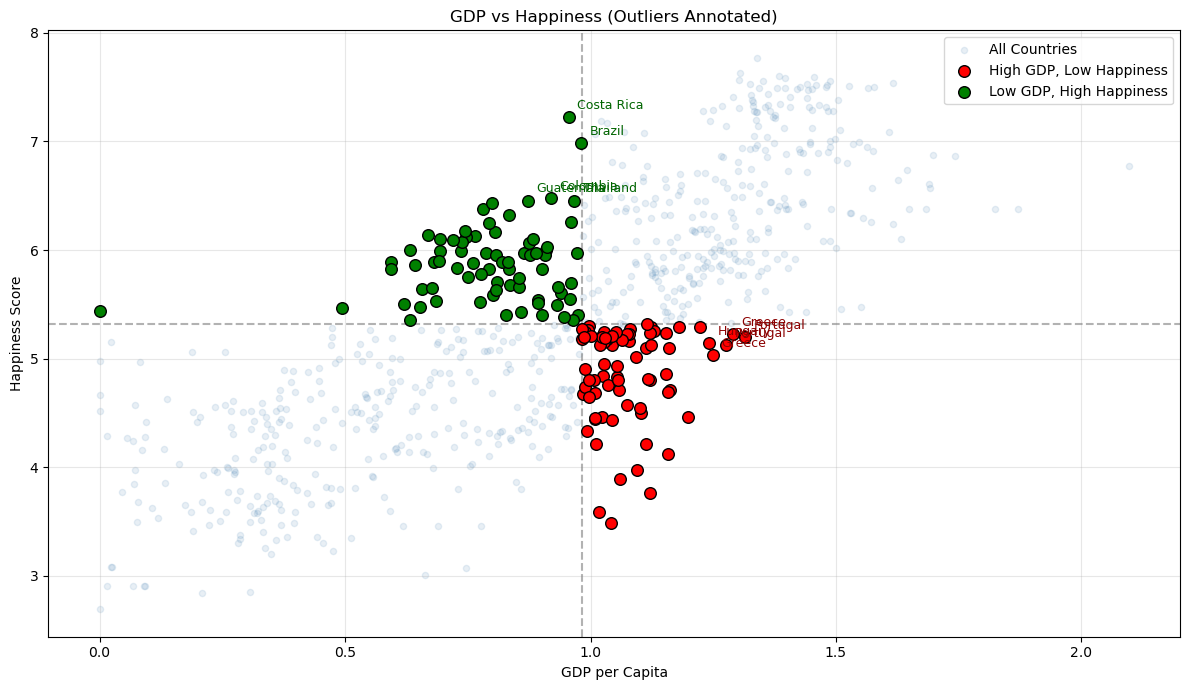

In [58]:
# I annotated only the most extreme cases (top deviations) so the chart stays clear  while still pointing out notable examples.

# I reduced visual clutter by making the background points smaller and more transparent,
# and I only annotate a few extreme cases. This keeps the plot readable while still
# highlighting countries that deviate from the typical GDP–happiness pattern.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# I plotted all observations as faint background points to show the overall pattern
plt.scatter(
    df_combined["gdp_per_capita"],
    df_combined["happiness_score"],
    alpha=0.12,          # lower alpha to reduce clutter
    s=20,                # smaller marker size
    color="steelblue",
    label="All Countries",
    zorder=1
)

# I plotted the outlier groups with bigger markers so they stand out from the background
plt.scatter(
    high_gdp_low_happy["gdp_per_capita"],
    high_gdp_low_happy["happiness_score"],
    color="red",
    s=70,
    edgecolor="black",
    label="High GDP, Low Happiness",
    zorder=3
)

plt.scatter(
    low_gdp_high_happy["gdp_per_capita"],
    low_gdp_high_happy["happiness_score"],
    color="green",
    s=70,
    edgecolor="black",
    label="Low GDP, High Happiness",
    zorder=3
)

# I added median reference lines to show the “high vs low” split used for the outlier definition
gdp_median = df_combined["gdp_per_capita"].median()
happy_median = df_combined["happiness_score"].median()
plt.axvline(gdp_median, color="grey", linestyle="--", alpha=0.6)
plt.axhline(happy_median, color="grey", linestyle="--", alpha=0.6)

# I selected a few examples to annotate to avoid overcrowding
annotate_high_gdp_low_happy = high_gdp_low_happy.sort_values("gdp_per_capita", ascending=False).head(5)
annotate_low_gdp_high_happy = low_gdp_high_happy.sort_values("happiness_score", ascending=False).head(5)

# I offset labels slightly so they don’t sit directly on top of points
for _, row in annotate_high_gdp_low_happy.iterrows():
    plt.annotate(
        row["country"],
        (row["gdp_per_capita"], row["happiness_score"]),
        textcoords="offset points",
        xytext=(6, 6),
        fontsize=9,
        color="darkred"
    )

for _, row in annotate_low_gdp_high_happy.iterrows():
    plt.annotate(
        row["country"],
        (row["gdp_per_capita"], row["happiness_score"]),
        textcoords="offset points",
        xytext=(6, 6),
        fontsize=9,
        color="darkgreen"
    )

plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("GDP vs Happiness (Outliers Annotated)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This scatter plot shows a clear positive relationship between GDP per capita and happiness score, indicating that higher income levels are generally associated with greater reported well-being. However, the highlighted outlier groups reveal important deviations from this overall trend.

Countries marked in **red** (high GDP but low happiness) demonstrate that economic prosperity alone does not guarantee high subjective well-being. Factors such as inequality, social cohesion, mental health, or governance quality may limit how economic gains translate into happiness.

Conversely, countries marked in **green** (low GDP but high happiness) suggest that strong social support systems, cultural factors, and effective institutions can sustain relatively high happiness levels even with limited economic resources.

The light blue points represent all other countries and provide context for the overall distribution, while the dashed reference lines indicate the median GDP and happiness thresholds used to identify outliers. Overall, this analysis highlights that while GDP is an important driver of happiness, non-economic factors play a crucial role in shaping well-being outcomes.